# ML Assignment 5
# Khushboo Patel, Aditi Gala, Jenny Khanh

## Question 1

In [1]:
import pandas as pd
import numpy as np
train1 = pd.read_csv("healthcareTrain.csv")
test1 = pd.read_csv("healthcareTest.csv")

x = train1[["total_los","num_op","num_er","num_ndc","pre_total_cost", "pre_CCI","pdc_80_flag"]]
y = test1[["total_los","num_op","num_er","num_ndc","pre_total_cost", "pre_CCI","pdc_80_flag"]]
x1 = train1[["total_los","num_op","num_er","num_ndc","pre_total_cost", "pre_CCI"]]
x2 = train1["pdc_80_flag"]
y1 = test1[["total_los","num_op","num_er","num_ndc","pre_total_cost", "pre_CCI"]]
y2 = test1["pdc_80_flag"]
x = (x - x.min()) / (x.max() - x.min())
y = (y - y.min()) / (y.max() - y.min())

In [267]:
from sklearn.neighbors import KNeighborsClassifier
k = 10
folds = np.array_split(x, k)
for i in range(10):
    train = folds.copy() 
    test = folds[i]
    del train[i]
    train = pd.concat(train, sort=False)

In [2]:
my_df = pd.DataFrame()
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
k = 10
folds = np.array_split(x, k)
for i in range(10):
    train = folds.copy() 
    test = folds[i]
    del train[i]
    train = pd.concat(train, sort=False)
    traininp = train[["total_los","num_op","num_er","num_ndc","pre_total_cost", "pre_CCI"]]
    testinp = test[["total_los","num_op","num_er","num_ndc","pre_total_cost", "pre_CCI"]]
    trainout = train["pdc_80_flag"]
    testout = test["pdc_80_flag"]
    
    
    score = []
    p=[]
    for k in range(31,102,2):
        model = KNeighborsClassifier(n_neighbors=k)
        model.fit(traininp, trainout)
        y_pred = model.predict(testinp)
        score.append(metrics.accuracy_score(testout,y_pred))
        p.append(k)
    #pd.DataFrame(score)
    
    col_name = str(i)
    my_df[col_name]=score
    



In [3]:
my_df["average"]=my_df.mean(axis=1)
my_df


,0,1,2,3,4,5,6,7,8,9,average
0,0.579710,0.572464,0.615942,0.666667,0.601449,0.601449,0.557971,0.630435,0.656934,0.540146,0.602317
1,0.572464,0.572464,0.623188,0.637681,0.601449,0.565217,0.565217,0.644928,0.678832,0.554745,0.601619
2,0.608696,0.579710,0.630435,0.652174,0.572464,0.565217,0.550725,0.579710,0.686131,0.562044,0.598731
3,0.608696,0.579710,0.615942,0.608696,0.579710,0.550725,0.565217,0.594203,0.671533,0.554745,0.592918
4,0.615942,0.550725,0.623188,0.630435,0.579710,0.557971,0.586957,0.630435,0.649635,0.547445,0.597244
5,0.601449,0.557971,0.615942,0.608696,0.594203,0.550725,0.565217,0.630435,0.693431,0.540146,0.595821
6,0.572464,0.565217,0.623188,0.594203,0.623188,0.536232,0.579710,0.652174,0.678832,0.525547,0.595076
7,0.565217,0.557971,0.630435,0.594203,0.630435,0.550725,0.572464,0.652174,0.678832,0.532847,0.596530
8,0.565217,0.565217,0.594203,0.565217,0.601449,0.550725,0.579710,0.644928,0.678832,0.532847,0.587835
9,0.572464,0.550725,0.594203,0.550725,0.594203,0.528986,0.579710,0.652174,0.686131,0.569343,0.587866


In [270]:
df = pd.DataFrame()
df["Accuracy"]= my_df.average
df["k value"]=p
max1= df["Accuracy"].max()
max1

0.6023167248492541

## b) Plot the accuracy rate from your 10-fold cross validation vs. K.

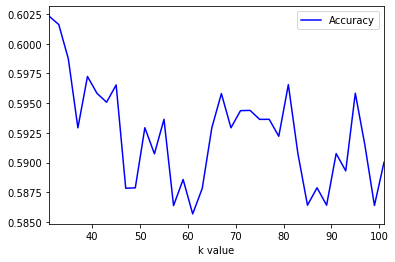

In [271]:
df.plot(kind='line',x='k value',y='Accuracy',color='blue')
plt.show()

The best accuracy is 60.23% which is for k = 31.

## c) Use the best value of K to predict the pdc-80-flag for the test set. How does your validation error compare to test error?

In [272]:
knn = KNeighborsClassifier(n_neighbors=31)

#Train the model using the training sets
knn.fit(x1, x2)

#Predict the response for test dataset
y_pred = knn.predict(y1)
print("Accuracy:",metrics.accuracy_score(y2, y_pred))

Accuracy: 0.5959302325581395


From the above comparison we can see that when we used k fold cross validation the accuracy was 60.23% but when we did not use cross validation the accuracy droped to 59.59%.

## Question 2

In [78]:
import pandas as pd
import numpy as np
from numpy.linalg import inv
import random
import matplotlib.pyplot as plt

from IPython.display import Image
from tqdm import tqdm

In [79]:
fun = lambda x: np.sin(np.pi*x)
def datapoints():
    x = np.random.uniform(-1,1,2)
    y = fun(x)
    return np.column_stack([x,y])

In [80]:
np.random.seed(123)
samples = [datapoints() for i in range(10000)]

#### Without Regularization

In [81]:
def linear_model(sample):
    X = np.column_stack([np.repeat(1, 2), sample[:,0]])
    y = sample[:,1]
    return np.dot(inv(np.dot(X.T, X)), np.dot(X.T, y))

In [82]:
without_reg = [linear_model(i) for i in samples]
g_x1 = np.mean(without_reg, axis=0)
g_x1

array([-7.23088131e-04,  7.79622943e-01])

In [274]:
print('Without Regularization: y={}+{}x'.format(round(g_x1[0], 6), round(g_x1[1], 3)))

Without Regularization: y=-0.000723+0.78x


#### With Regularization

In [83]:
def linear_fit_wr(sample, lamda=0.1):
    X = np.column_stack([np.repeat(1, 2), sample[:,0]])
    y = sample[:,1]
    return np.dot(inv(np.dot(X.T, X) + lamda*np.identity(2)), np.dot(X.T, y))

In [84]:
lamda = 0.1
with_reg = [linear_fit_wr(i, lamda) for i in samples]
g_x2 = np.mean(with_reg, axis=0)
g_x2

array([0.00590695, 0.63090971])

In [276]:
print('With Regularization: y={}+{}x'.format(round(g_x2[0], 4), round(g_x2[1], 4)))


With Regularization: y=0.0059+0.6309x


## Question 2

#### Without Regularization

In [85]:
y = np.array([i[:,1] for i in samples]).flatten()
get_g = lambda sample, eqa: np.dot(np.column_stack([np.repeat(1,2), sample[:,0]]), eqa)

In [86]:
bias = (np.array([get_g(i, g_x1) for i in samples]).flatten() - y)**2
bias_mean = np.mean(bias)

In [87]:
print('Without regularization bias^2: {}'.format(round(bias_mean, 3)))

Without regularization bias^2: 0.206


#### With Regularization

In [88]:
bias2 = (np.array([get_g(i, g_x2) for i in samples]).flatten() - y)**2
mean_bias2 = np.mean(bias2)

In [89]:
print('With regularization bias^2: {}'.format(round(mean_bias2, 3)))

With regularization bias^2: 0.231


### Question 3

In [90]:
xx = np.array([i[:,0] for i in samples]).flatten()
all_X = np.column_stack([np.repeat(1, len(xx)), xx])



#### Without REegularization

In [91]:
g_bar_x = np.dot(all_X, g_x1)
all_var_wor = [np.mean((np.dot(np.row_stack(without_reg), all_X[i]) - g_bar_x[i])**2) for i in tqdm(range(len(g_bar_x)))]
var_wor = np.mean(all_var_wor)

100%|██████████| 20000/20000 [04:47<00:00, 69.45it/s]


In [92]:
print('Without Regularization variance: {}'.format(round(var_wor, 3)))

Without Regularization variance: 1.672


#### With Regularization

In [70]:
all_g_bar_x_wr = np.dot(all_X, g_x2)
all_var_wr = [np.mean((np.dot(np.row_stack(with_reg), all_X[i]) - all_g_bar_x_wr[i])**2) for i in tqdm(range(len(all_g_bar_x_wr)))]
var_wr = np.mean(all_var_wr)

100%|██████████| 20000/20000 [05:03<00:00, 65.86it/s]


In [71]:
print('With Regularization variance: {}'.format(round(var_wr, 3)))

With Regularization variance: 0.327


## Question 4

In [93]:
x = np.array([i[:,0] for i in samples]).flatten()
y = np.array([i[:,1] for i in samples]).flatten()

In [94]:
g_bar_x_wor = np.array([get_g(i, g_x_wor) for i in samples]).flatten()
up_lim_wor = g_bar_x_wor + np.sqrt(np.array(all_var_wor))
low_lim_wor = g_bar_x_wor - np.sqrt(np.array(all_var_wor))

In [76]:
g_bar_x_wr = np.array([get_g(i, g_x_wr) for i in samples]).flatten()
up_lim_wr = g_bar_x_wr + np.sqrt(np.array(all_var_wr).flatten())
low_lim_wr = g_bar_x_wr - np.sqrt(np.array(all_var_wr).flatten())

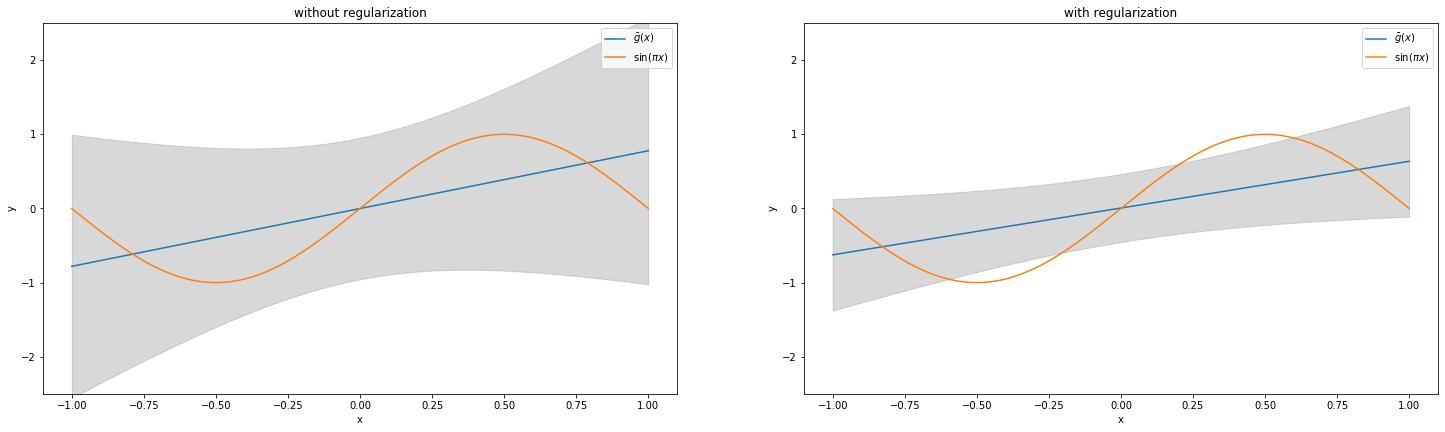

In [77]:
plt.figure(figsize=(25,15))
plt.subplot(221)
plt.plot(np.sort(x), g_bar_x_wor[np.argsort(x)], label=r'$\bar{g}(x)$')
plt.plot(np.sort(x), y[np.argsort(x)], label=r'sin($\pi x$)')
plt.fill_between(np.sort(x), up_lim_wor[np.argsort(x)], low_lim_wor[np.argsort(x)], color='grey', alpha=0.3)
plt.title('without regularization')
plt.xlabel('x')
plt.ylabel('y')
plt.ylim(-2.5,2.5)
plt.legend()

plt.subplot(222)
plt.plot(np.sort(x), g_bar_x_wr[np.argsort(x)], label=r'$\bar{g}(x)$')
plt.plot(np.sort(x), y[np.argsort(x)], label=r'sin($\pi x$)')
plt.fill_between(np.sort(x), up_lim_wr[np.argsort(x)], low_lim_wr[np.argsort(x)], color='grey', alpha=0.3)
plt.title('with regularization')
plt.xlabel('x')
plt.ylabel('y')
plt.ylim(-2.5,2.5)
plt.legend()
plt.show()

Here, the grey shaded region show g(x)+_var**0.5. Without regularization there is less bias but more variance whereas with regularization we have slight increase in bias and variance decreases significantly. Hence, the total out sample error also decreases. Therefore we should go for model with regularization.